# HOUSING PRICE PREDICTION CASE STUDY

## Problem Statement

Surprise Housing, a US-based company has decided to enter the Australian market. The company uses data analytics to purchase houses at a lower market price and resells them for more. The company is looking for potential properties to purchase in Australia. As such, the company needs to decide whether to invest into them and in order to do that, we have to predict the houses actual price. 

## Business Objective
We have to model the actual price of the houses in respect with the provided independent variables. The management will then utilize this model to figure out the extent the variables affect the price. They can then adjust the firm's strategy and focus on regions that will generate larger profits. Furthermore, the model would assist management in comprehending the price dynamics of a new market.


In [2839]:
#Loading the libraries
##Libraries for data manipulation
import numpy as np
from numpy import isnan
import pandas as pd 
import calendar
from calendar import day_name
from sklearn.preprocessing import StandardScaler, LabelEncoder
#Libraries for data plotting 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
# Importing libraries for data modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import statsmodels.api as sm  
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import durbin_watson

In [2840]:
#Setting options to print all columns for large dataset - For better visualization
pd.options.display.max_columns = None

## 1. Data Understanding

In this first phase, we will import the dataset and look at the data present and the data shape

In [2841]:
#Read data from csv file 
house_df = pd.read_csv("train.csv")

In [2842]:
#Check the first 5 rows of data 
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2843]:
#check the amount of rows and columns in the dataframe
house_df.shape

(1460, 81)

In [2844]:
#check the concise summary of the dataframe
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2845]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. Data Manipulation

In this section, the data will be analysed and only relevant columns and rows will be kept. 
The first step is to identify the number of null values in each column and row. 
Data duplicacy will be checked and each column will be converted to appropriate data types. The following operations will be performed:

1. Handle Missing Values
2. Drop unrelevant columns
3. Deriving new variables
4. Data types conversion

Handling outliers will be tackled in the next section.

### i) Handle Missing values 

We shall compute missing values for each column and also check if there is any row which is empty. Additionally we will also drop all single-valued column if there are any present in the dataset.

In [2846]:
#Idenfifying how many null values are there in each column 
na_percentage = round((house_df.isnull().sum() * 100/ len(house_df)),2) 
#printing cols with null values only
print(na_percentage[na_percentage >0].sort_values(ascending=False))

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [2847]:
#check if any rows have all missing values
house_df.isnull().all(axis=1).sum()

0

In [2848]:
#Drop all single-valued column (if there are any)
house_df = house_df[[i for i in house_df if house_df[i].nunique()>1]]

In [2849]:
house_df.shape

(1460, 81)

The categorical features like 'PoolQC','MscFeature' and 'Alley' have over 90% null values. Nonetheless, after studying the data definition, all the NA values for categorical features have a signifance and it means "not present". For instance, NA for PoolQC means 'No Pool and NA for Alley means no alley accessm and so on. 

Hence we will impute those values to their original state and fill them as 'NA'.

In [2850]:
na_cols =['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond' ,'BsmtQual', 'FireplaceQu','MasVnrType']
for col in na_cols:
    house_df[col] = house_df[col].fillna('NA')

In [2851]:
house_df[house_df['GarageYrBlt'].isnull()][['GarageYrBlt', 'GarageType']]

,GarageYrBlt,GarageType
39,NaN,NA
48,NaN,NA
78,NaN,NA
88,NaN,NA
89,NaN,NA
99,NaN,NA
108,NaN,NA
125,NaN,NA
127,NaN,NA
140,NaN,NA


We can observe that all the rows with missing value for 'GarageYrBlt' column, has NA for GarageType which means those houses do not have garage. As such we will impute the null values for GarageYrBlt with 0.

In [2852]:
#Since garage were imputed with 'no garage' -- so filling GarageYrBlt to 0
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

In [2853]:
house_df[house_df['MasVnrArea'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NA,NaN
529,NA,NaN
650,NA,NaN
936,NA,NaN
973,NA,NaN
977,NA,NaN
1243,NA,NaN
1278,NA,NaN


It can be clearly seen that all the rows with missing value for 'MasVnrArea' column, has NA for MasVnrType which means those houses do not have Masonry veneer. As such we will impute the null values for MasVnrArea with 0.

In [2854]:
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)

Before imputing the missing values for LotFrontage, we will check the visualization of the data first by plotting a histogram and a box plot

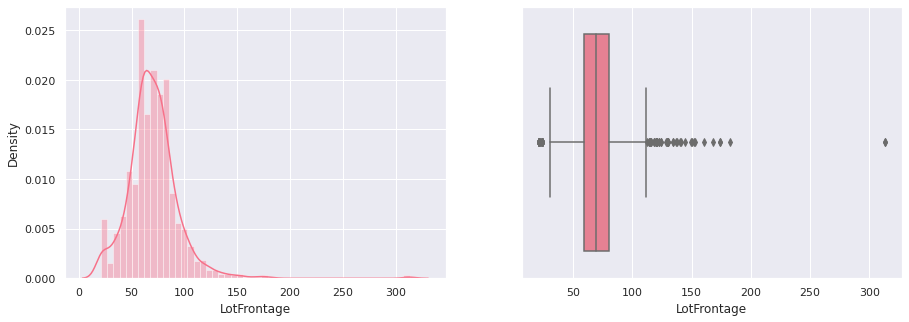

In [2855]:
# Plot distribution
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.distplot(house_df['LotFrontage'],ax=ax[0])
sns.boxplot(x=house_df['LotFrontage'], ax=ax[1])
fig.show()

In [2856]:
#There appears to be outliers in LotFrontage, hence we shall impute using median 
house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(), inplace=True)

In [2857]:
#Since Electrical Column is of categorical type, we will impute the missing values with mode
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

### ii) Drop irrelevant columns

The column Id in the dataset is simply a unique identifier and it has no significance, it will hence be dropped.

In [2858]:
#drop id column as it is of no significance in model building
house_df.drop(['Id'], axis=1, inplace=True)

### iii) Deriving variables

In this section, we will derive three new features and they are as follows:
1. Remodel: This feature is an indicator if the house has been remodelled ever since it was built
2. HouseAge: This feature indicates after how many years was the house sold since built
3. GarageAge: This feature indicates how many years earlier was the garage built when sold. 

These features are important because they affect the Sale price and usually the older the house and garage the more affordable the price. And house remodeling brings up the sale price because the house condition would be better. 

In [2859]:
#Derive remodel variable by comparing the dates provided
def check_remodel(row):
    if (row['YearBuilt'] == row['YearRemodAdd']):
        return 'No'
    else: 
        return 'Yes'

house_df['Remodel'] = house_df.apply(check_remodel, axis=1)

In [2860]:
#Derive the house age from the year it was built to when it was sold
def calc_houseAge(row):
    return (row['YrSold'] - row['YearBuilt'])

house_df['HouseAge'] = house_df.apply(calc_houseAge, axis=1)

In [2861]:
#Derive the garage age from the year it was built to when it was sold
def calc_grgAge(row):
    if row['GarageYrBlt'] > 0:
        return (row['YrSold'] - row['GarageYrBlt'])
    else:
        return 0

house_df['GarageAge'] = house_df.apply(calc_grgAge, axis=1)
house_df['GarageAge'] = house_df['GarageAge'].astype('int64')

In [2862]:
dropCols = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']
house_df  = house_df.drop(dropCols,axis=1)

### iv) Data Types Conversion

All the columns that are of type object would be changed to categorical type. 

In [2863]:
#Checking the list of columns of type object
house_df.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Remodel'],
      dtype='object')

In [2864]:
#Converting all the columns listed above to data type category
house_df[house_df.select_dtypes(['object']).columns] = house_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [2865]:
#Checking the list of columns of type integer
house_df.select_dtypes(['int64']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'HouseAge', 'GarageAge'],
      dtype='object')

From the list, the features 'MSSubClass', 'OverallQual', 'OverallCond' are actually categorical in nature but their values were represented in numerical format. Hence, we will convert all three columns to category types


In [2866]:
#Converting columns to category type
for col in ['MSSubClass', 'OverallQual', 'OverallCond', 'Remodel']:
    house_df[col] = house_df[col].astype('category')

In [2867]:
#Checking the the dataset info making sure it's all in order
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

## 3. Data Visualization

This is one of the most crucial step because it helps us to visualize the distribution of data.
It curates the data into a form easier to understand, highlighting the trends and outliers. If outliers are detected, they shall be removed.

This section consists of univariate, segmented and bivariate Analysis of the data.

### Visualizing Target Variable 

Target variable will be checked for outliers and its skewness

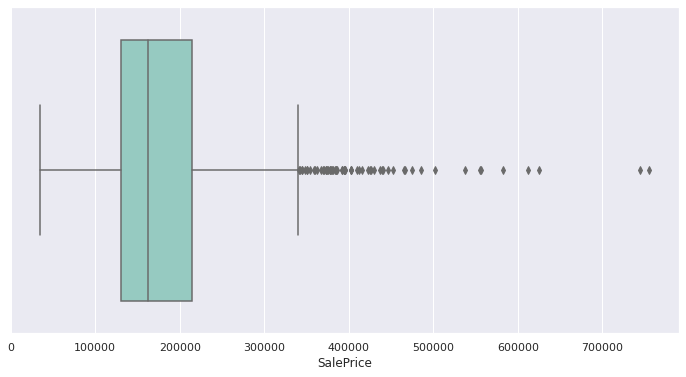

In [2868]:
#We start by visualizing the target variable
#Plotting the boxplot for salePrice to check for outliers
sns.set_theme(style="darkgrid", palette="Set3")
sns.boxplot(x=house_df['SalePrice'])
fig.show()

##### The target variable clearly has outliers and the values out of bound will be dropped. 

After calculating the lower extreme and upper extreme, all the data points that falls within that range will be dropped

In [2869]:
# Some values are clearly out of bound and need to be removed
# Calculate quantiles and IQR
q1 = house_df['SalePrice'].quantile(0.25)
q3 = house_df['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_ex =  q1 - 1.5 * iqr
upper_ex = q3 + 1.5 * iqr
#Dropping all rows whose salePrice is less than lower extreme or upper extreme -- they are outliers.
out = house_df[(house_df['SalePrice'] < lower_ex) | (house_df['SalePrice'] > upper_ex)].index
house_df.drop(out, inplace= True)

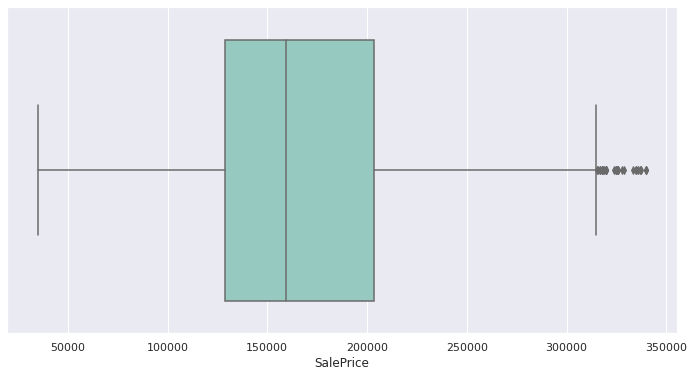

In [2870]:
#Plotting the boxplot for SalePrice to check for outliers
sns.boxplot(x=house_df['SalePrice'])
fig.show()

After outliers have been removed, the target variable looks good. A total of 61 rows were dropped and we still have ample data to build the model

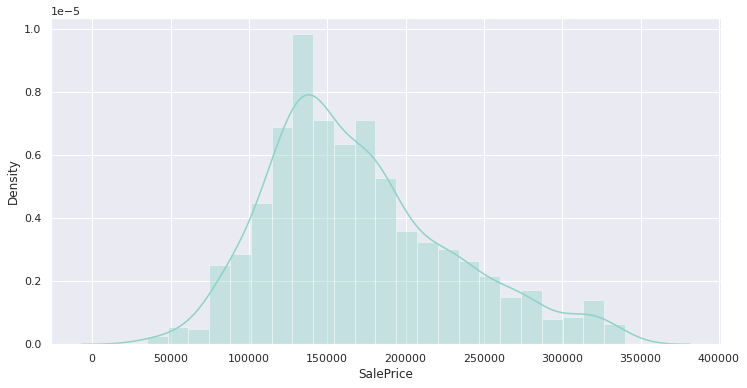

In [2871]:
#checking the skewness of data in the target column
sns.distplot(house_df["SalePrice"])
plt.show()

The distribution looks acceptable after the outliers has been removed, as such I will not peform any log transformation on this dataset

In [2872]:
house_df.shape

(1399, 78)

### Visualizing Categorical Variables

In [2873]:
#Extracting the categorical features
categorical_df = house_df.select_dtypes(['category'])
categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'Remodel'],
      dtype='object')

We will first map the correct text values to 'OverallQual' and 'OverallCond' columns and then proceed to plot the data for better visualization.

In [2874]:
#map the proper text to neach numerical value
conditions = {10:"Vry Ex",9:"Ex",8:"Vry Good",7:"Good",6:"Abv Av",5:"Av",4:"Blw Av",3:"Fair",2:"Poor",1:"Vry Poor"}

categorical_df['OverallQual'] = categorical_df.OverallQual.map(conditions)
categorical_df['OverallCond'] = categorical_df.OverallCond.map(conditions)

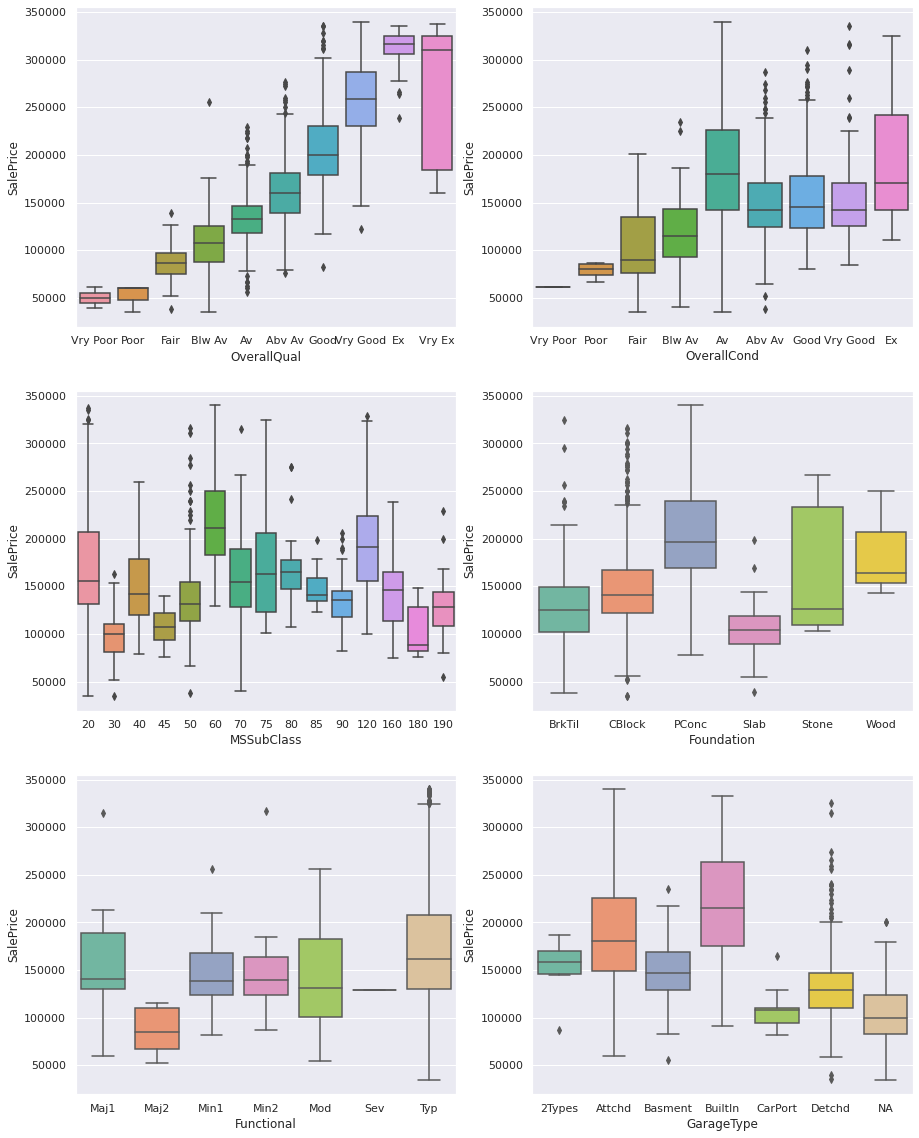

In [2875]:
#Plotting the boxplot for certain important categorical columns
sns.set_theme(style="darkgrid", palette="Set2")

plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.boxplot(x=categorical_df['OverallQual'],y=house_df['SalePrice'])
plt.subplot(3,2,2)
sns.boxplot(x=categorical_df['OverallCond'],y=house_df['SalePrice'])
plt.subplot(3,2,3)
sns.boxplot(x=categorical_df['MSSubClass'],y= house_df['SalePrice'])
plt.subplot(3,2,4)
sns.boxplot(x=categorical_df['Foundation'],y=house_df['SalePrice'])
plt.subplot(3,2,5)
sns.boxplot(x=categorical_df['Functional'],y=house_df['SalePrice'])
plt.subplot(3,2,6)
sns.boxplot(x=categorical_df['GarageType'],y=house_df['SalePrice'])
plt.show()

**Observation**
- The better the condition of the houses, the higher the sale price
- There are some outliers in the dataset, however they represent natural variations in the dataset and they would be left as it is.

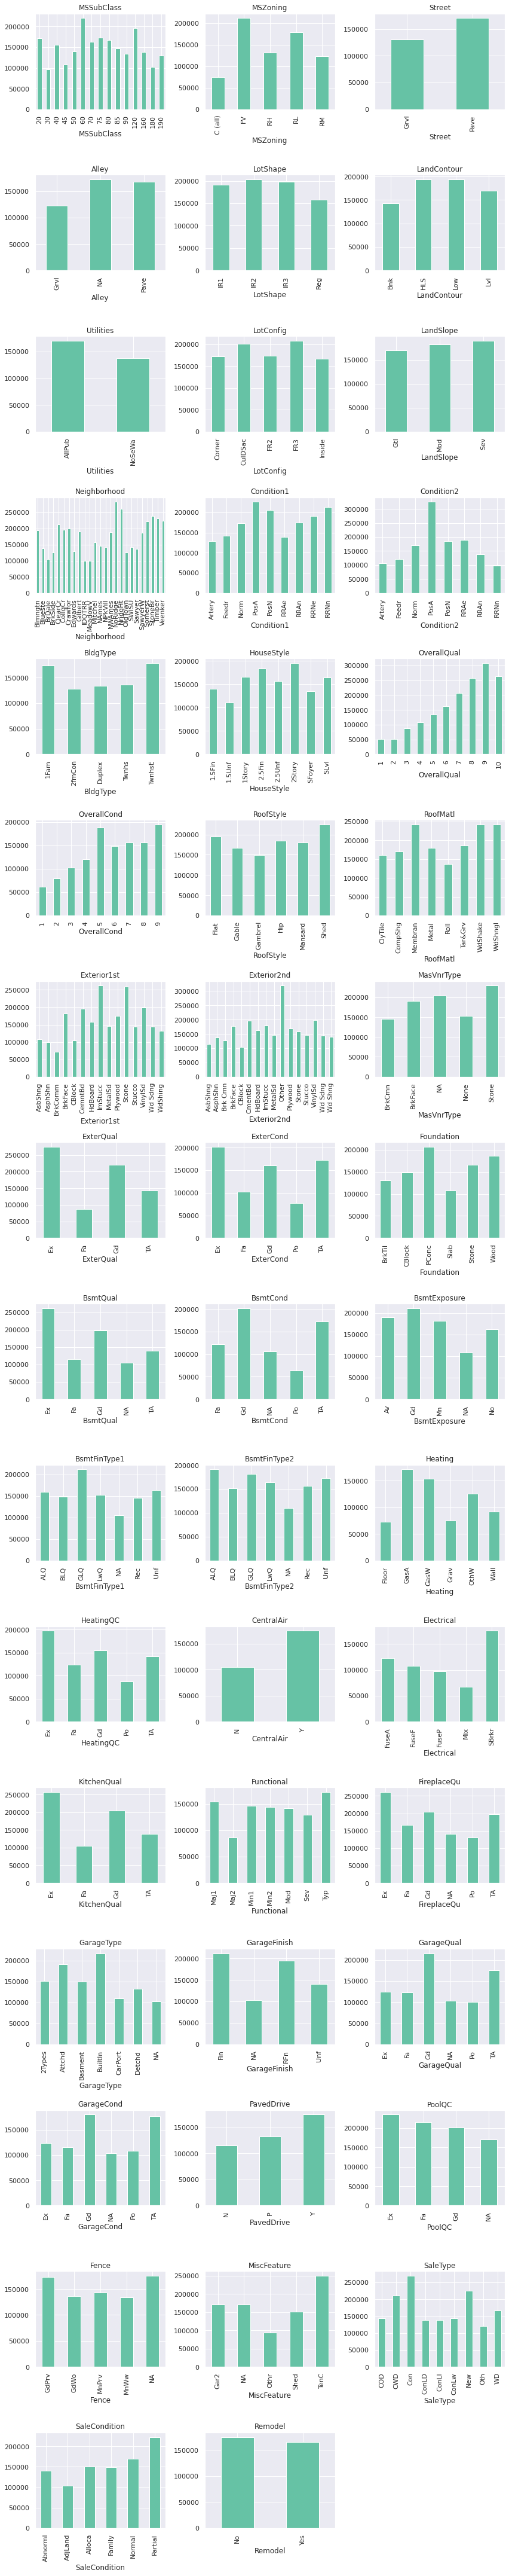

In [2876]:
# Plot bar plot for all categorical variable in respect to salePrice
fig = plt.figure(1,figsize=(12,60))
for i, col in enumerate(categorical_df.columns,1):
    fig.add_subplot(16,3,i,)
    house_df.groupby(col).mean()['SalePrice'].plot(kind='bar',ax=plt.gca())
    plt.title(col)
plt.tight_layout()
plt.show()


**Observation**
- Very few categorical features varies with relation to the Sale Price 
- The factors that lead to higher price seems to be an overall quality and overall condition of 9,a paved street and excellent external quality and condition as well as an excellent basement quality and condition, among others.

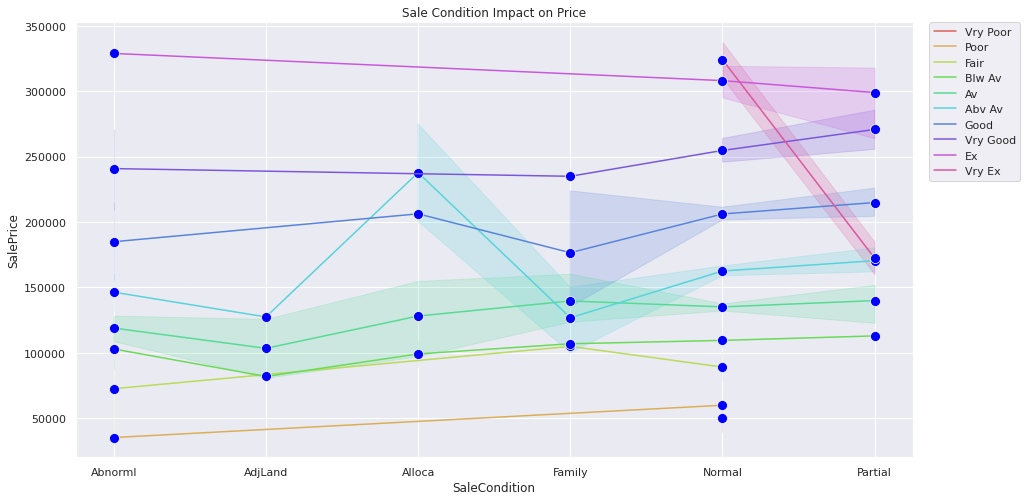

In [2877]:
plt.figure(figsize=(15,8))
sns.lineplot(x=categorical_df['SaleCondition'], y=house_df['SalePrice'],hue= categorical_df['OverallQual'],marker = 'o', palette="hls",
         markerfacecolor = 'blue', markersize = 10).set_title('Sale Condition Impact on Price')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**Observation**
- The Sale Price is definitely higher when the the condition is normal and the overall Quality of the house is very excellent
- Overall Quality of the house alone is not enough of an indicator because even if the quality is very excellent but the sale condition is partial, there is a significant drop in the price.
- When the house quality is poor and the sale condition is Abnormal, the sale price is at its lowest (cheapest)

### Visualizing Numerical Variables

In [2878]:
#Extracting all numerical features for visualization purposes
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,GarageAge
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,5,5
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,31,31
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,7,7
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,91,8
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,8,8


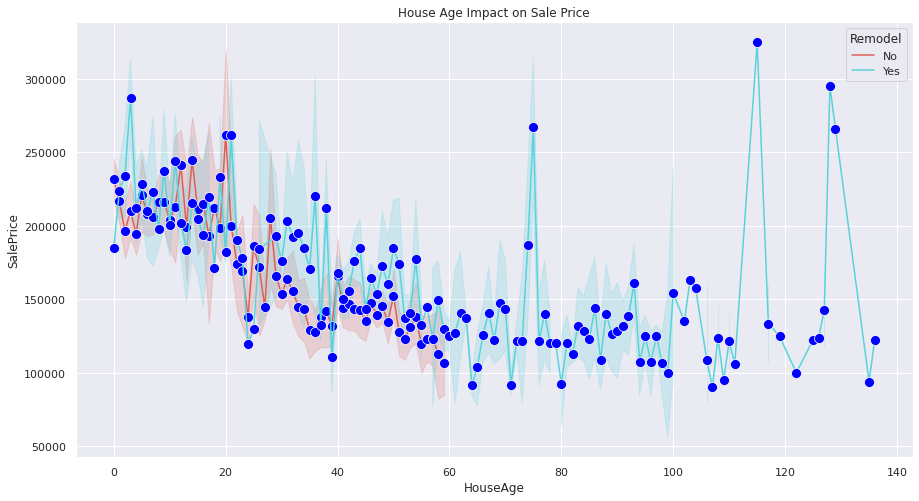

In [2879]:
plt.figure(figsize=(15,8))
sns.lineplot(x=house_numeric["HouseAge"], y=house_numeric["SalePrice"], hue=house_df['Remodel'],marker = 'o', palette="hls",
         markerfacecolor = 'blue', markersize = 10).set_title('House Age Impact on Sale Price')
plt.show()

**Observation**
- The sale Price is more expensive when the house has been remodeled irrespective of how many years ago the house was built.
- The cheapest house tend to be those which was built over 20 to 60 years ago and not remodeled.

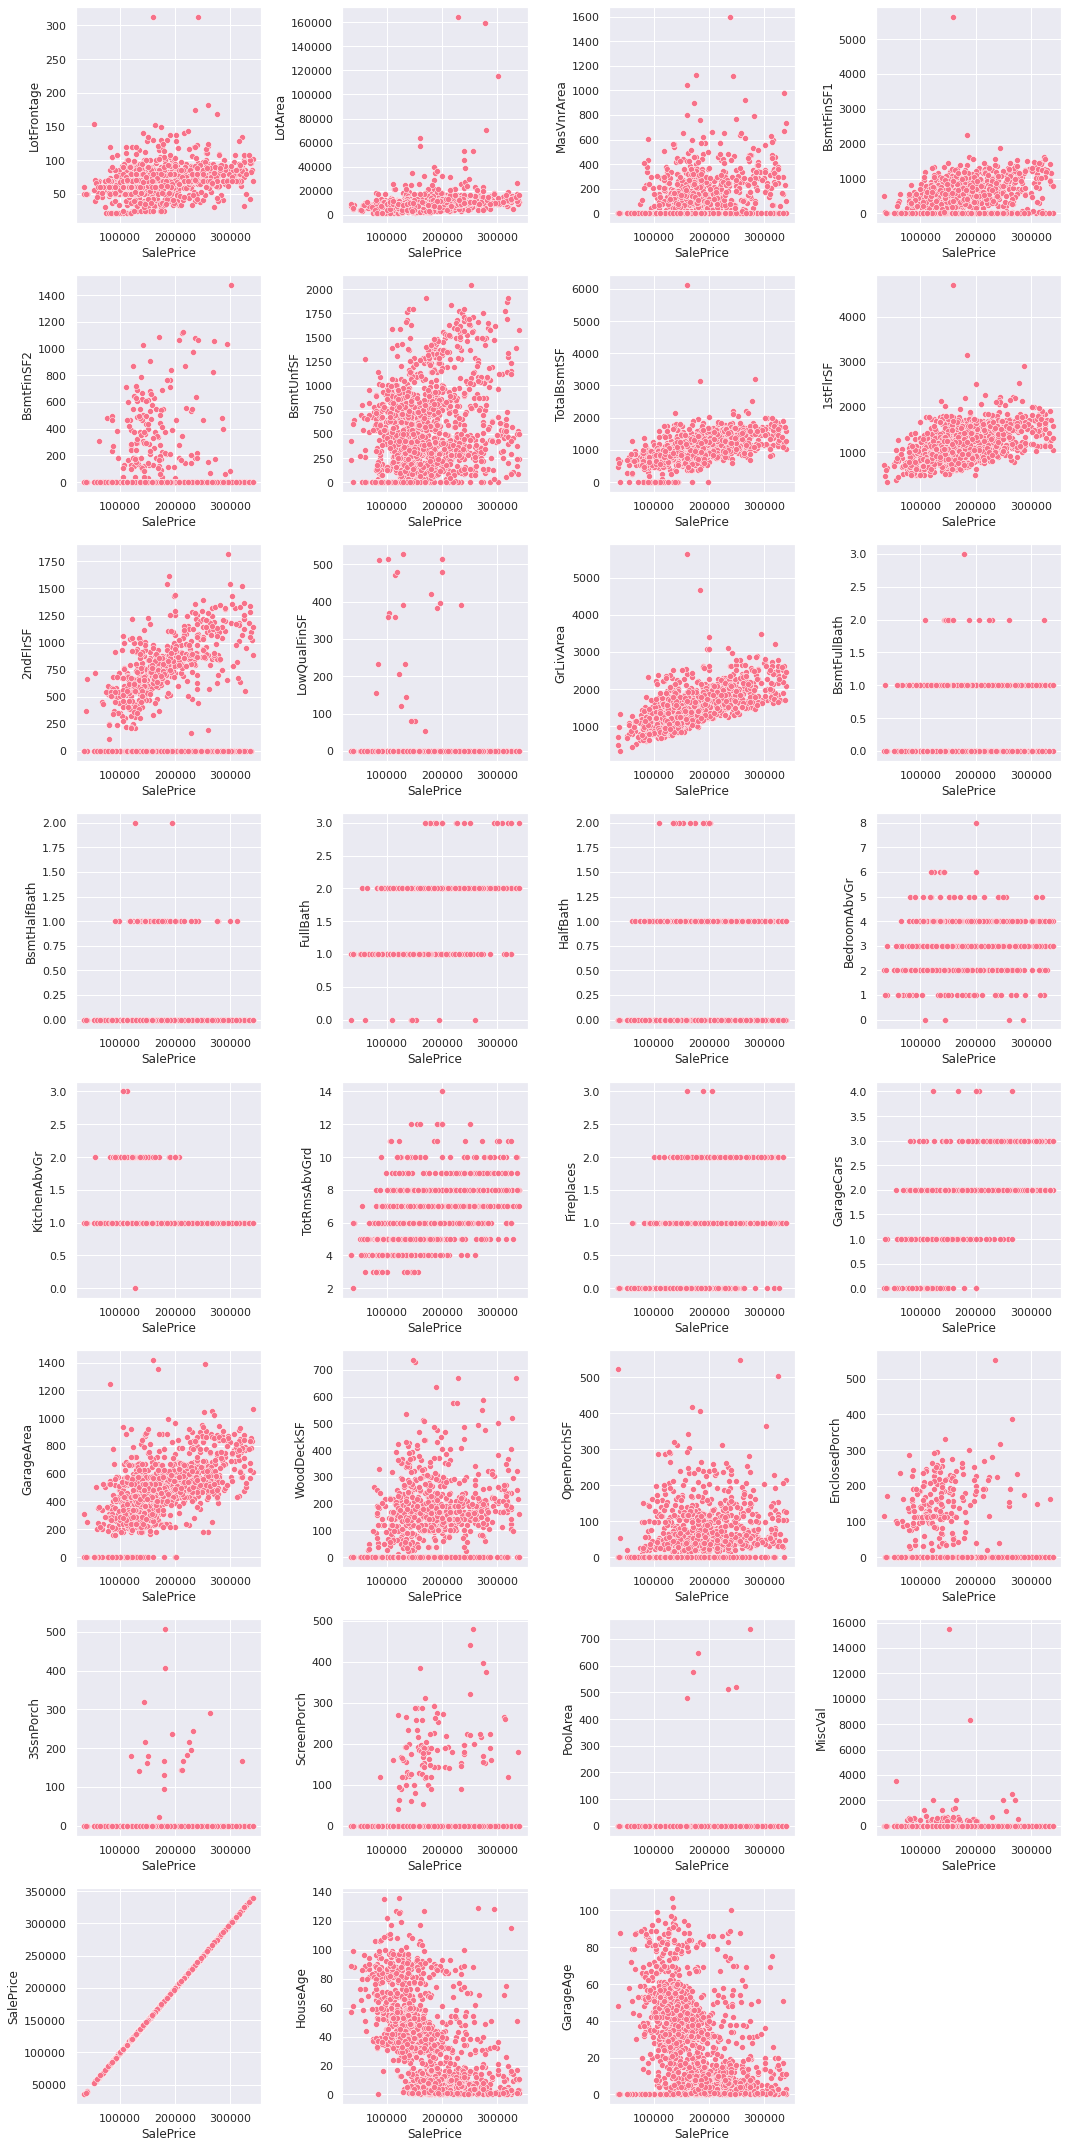

In [2976]:
#scatter plot to see the relationship between SalePrice and other numeric features
sns.set_theme(style="darkgrid", palette="husl")
count=1
plt.subplots(figsize=(15, 30))
for i in house_numeric.columns:
    plt.subplot(8,4,count)
    sns.scatterplot(house_numeric["SalePrice"],house_numeric[i])
    count+=1
    
plt.tight_layout()
plt.show()

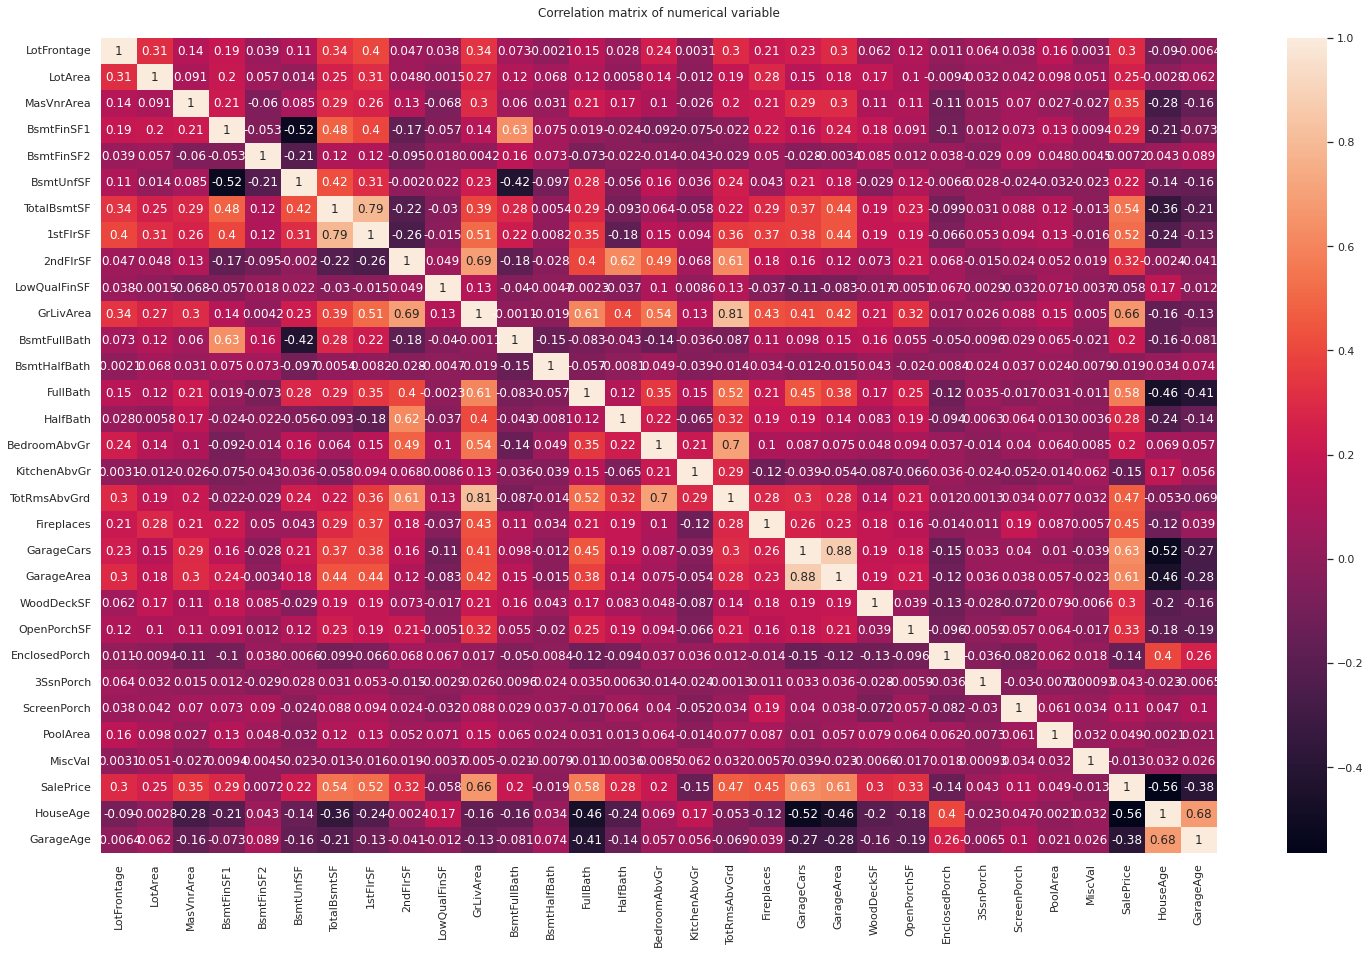

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,GarageAge
LotFrontage,1.000000,0.310615,0.135240,0.194962,0.039418,0.108742,0.335661,0.396428,0.046727,0.037617,0.339448,0.072791,-0.002059,0.146421,0.028367,0.241825,0.003066,0.296644,0.209619,0.234365,0.296700,0.061563,0.117176,0.010524,0.064002,0.037779,0.161694,0.003130,0.295796,-0.089536,-0.006441
LotArea,0.310615,1.000000,0.090614,0.203555,0.057139,0.014446,0.252314,0.307689,0.047520,-0.001544,0.270307,0.120442,0.067959,0.120896,0.005780,0.142965,-0.012410,0.186235,0.280514,0.147864,0.183981,0.174801,0.102608,-0.009359,0.031653,0.042003,0.098440,0.050528,0.249812,-0.002821,0.062066
MasVnrArea,0.135240,0.090614,1.000000,0.213219,-0.060459,0.084789,0.289698,0.261206,0.125750,-0.067856,0.297826,0.060002,0.031197,0.214808,0.167954,0.102695,-0.026438,0.202319,0.212568,0.291880,0.297762,0.106240,0.111861,-0.113757,0.015367,0.069776,0.026999,-0.026690,0.350541,-0.279995,-0.160084
BsmtFinSF1,0.194962,0.203555,0.213219,1.000000,-0.052980,-0.520300,0.482465,0.395753,-0.167881,-0.057332,0.141392,0.634381,0.074970,0.019448,-0.024232,-0.091932,-0.074909,-0.021848,0.216641,0.158081,0.237109,0.178227,0.090669,-0.102079,0.011991,0.073321,0.127790,0.009389,0.290377,-0.210848,-0.072723
BsmtFinSF2,0.039418,0.057139,-0.060459,-0.052980,1.000000,-0.213893,0.118198,0.115401,-0.094992,0.017546,0.004227,0.159540,0.073063,-0.073203,-0.022478,-0.014047,-0.042567,-0.028815,0.049702,-0.027568,-0.003431,0.085290,0.012380,0.038022,-0.029238,0.090460,0.047898,0.004494,0.007154,0.043424,0.089351
BsmtUnfSF,0.108742,0.014446,0.084789,-0.520300,-0.213893,1.000000,0.421814,0.307856,-0.001955,0.022407,0.229399,-0.423529,-0.097350,0.279080,-0.055556,0.157924,0.035579,0.240316,0.042901,0.206804,0.180340,-0.028587,0.121763,-0.006626,0.028421,-0.023958,-0.031918,-0.023440,0.222795,-0.143279,-0.164300
TotalBsmtSF,0.335661,0.252314,0.289698,0.482465,0.118198,0.421814,1.000000,0.787402,-0.216716,-0.029693,0.392498,0.284657,0.005408,0.285619,-0.093092,0.064222,-0.058320,0.219000,0.293132,0.373523,0.438428,0.191509,0.228824,-0.099234,0.030918,0.088045,0.119968,-0.013049,0.543508,-0.355712,-0.214158
1stFlrSF,0.396428,0.307689,0.261206,0.395753,0.115401,0.307856,0.787402,1.000000,-0.259180,-0.014899,0.514792,0.219761,0.008171,0.345793,-0.179565,0.146134,0.093733,0.357760,0.366892,0.377347,0.438573,0.192433,0.189767,-0.065531,0.053007,0.093582,0.125121,-0.015700,0.522785,-0.240601,-0.128814
2ndFlrSF,0.046727,0.047520,0.125750,-0.167881,-0.094992,-0.001955,-0.216716,-0.259180,1.000000,0.049376,0.689136,-0.183107,-0.027770,0.399842,0.615768,0.485025,0.068214,0.611320,0.181219,0.161293,0.115121,0.072912,0.206577,0.067539,-0.014778,0.024205,0.051782,0.019378,0.317358,-0.002415,-0.041193
LowQualFinSF,0.037617,-0.001544,-0.067856,-0.057332,0.017546,0.022407,-0.029693,-0.014899,0.049376,1.000000,0.130638,-0.040321,-0.004683,-0.002253,-0.036828,0.103168,0.008612,0.125283,-0.036614,-0.111552,-0.083114,-0.016829,-0.005102,0.067442,-0.002948,-0.032183,0.071475,-0.003693,-0.058086,0.169705,-0.012099


In [2881]:
plt.figure(figsize=(25,15))

hm = sns.heatmap(house_numeric.corr(), annot = True)
hm.set(title = "Correlation matrix of numerical variable\n")
plt.show()

corr = house_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

**Observation**
- Based on the scatter plot and correlation plot, it can be deduced that GrLivArea has the highest positive correlation with Sale Price. 
- Features like LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, MiscVal, HouseAge and GarageAge have negative correlation with Sales Price
- The other features have positive correlation with Sale Price.
- We also notice that features like GarageCars and GarageArea are strongly correlated and it justifies because the bigger the garage, the more cars will fit. 

## 4. Data Preparation

This is one of the most important phase because it prepares the data for the model.
- Transform all categorical data by encoding because ML only accept numerical data
- Feature of ordinal nature will be encoded using scale mapping while others will be encoded using one-hot encoder technique
- Drop respective columns after encoding.
#### Scaling is also a process in data pre processing, however this step shall only be performed after the dataframe has been split into train and test set ( next stage).

In [2882]:
# List of ordinal columns
ordinal_var = ["OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC"]

#### Ordinal Encoding

Instead of using label encoding, I opted to use a defined scale to map the values to appropriate numerical values for columns that were ordinal in nature.

In [2883]:
scale_mapper = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0}
for column in ordinal_var:
    # we are excluding the columns OverallQual and OverallCond because they already hold numerical values
    if column != 'OverallQual' or column != 'OverallCond' :
        house_df[column] = house_df[column].replace(scale_mapper)

In [2884]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Remodel,HouseAge,GarageAge
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,NA,NA,0,WD,Normal,208500,No,5,5
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,NA,NA,0,WD,Normal,181500,No,31,31
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,NA,NA,0,WD,Normal,223500,Yes,7,7
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,NA,NA,0,WD,Abnorml,140000,Yes,91,8
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,NA,NA,0,WD,Normal,250000,No,8,8


#### One Hot Encoding

We will extract all the categorical columns and then exclude the ordinal ones from them. The other remaining columns will be encoded using one hot encoding method where dummny variables will be created. 
A dummy variable is a numerical variable that will represent subgroups of the categorical features. It is important to note that the first value in each feature will be dropped to reduce collinearity.

In [2885]:
#Get all the categorical features
categorical_columns = house_df.select_dtypes(['category']).columns

In [2886]:
#Remove the ordinal features from the list
house_cat = house_df.select_dtypes(include=['category'])
house_cat = house_cat.loc[:, ~house_cat.columns.isin(ordinal_var)]

In [2887]:
house_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,Remodel
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,No,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,No
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,Gd,ALQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,No
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Mn,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,Yes
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,No,ALQ,Unf,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NA,NA,WD,Abnorml,Yes
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Av,GLQ,Unf,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,No


In [2888]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_cat, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Remodel_Yes
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,

In [2889]:
# Drop the original features because their dummies are already created
house_df = house_df.drop(list(house_cat.columns), axis=1)

In [2890]:
# Join the dummy columns with the actual dataset
house_df = pd.concat([house_df, house_dummies], axis=1)

In [2891]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Columns: 242 entries, LotFrontage to Remodel_Yes
dtypes: category(2), float64(2), int64(39), uint8(199)
memory usage: 766.7 KB


In [2892]:
house_df_cpy = house_df.drop('SalePrice', axis=1)
features = house_df_cpy.columns
features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Remodel_Yes'],
      dtype='object', length=241)

## 5. Data Modelling

Following data understanding and data preparation, the fifth phase in the data pipeline involves the creation of intelligent machine learning models to support advanced analytics. It follows the steps below:
 
 1. Split the data into training and testing sets
 2. Feature Scaling
 3. Build Model by Regularization

### Split Train and Test Sets

This is an important step to evaluate the final model -- after the model has learnt from the training set, the model can be tested by making predictions against the test set. 

It is easy to determine whether the model's prediction are correct, because the test set already contain the values for 'SalePrice'.

In [2893]:
# We select the random_state to avoid getting different values for train and test sets every time it runs. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)
df_train, df_test = train_test_split(house_df, train_size = 0.7, random_state = 100)

### Feature Scaling

Scaling will be performed to generalize data points so that the distance between them will be lower. Scaling is important because it optimises the training process and do not give higher importance to higher value unnecessarily.

It is necessary to standardize variables before using Lasso and Ridge Regression. We will use Standard Scaler for feature scaling

In [2894]:
scaler = StandardScaler()

#excluding all columns that went through one-hot encoding
numeric_col = house_df.select_dtypes(['int64', 'float64', 'category']).columns
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])
df_test[numeric_col] = scaler.transform(df_test[numeric_col])

In [2895]:
# Assigning the target variable SalePrice to y
y_train=  df_train.pop('SalePrice')
y_test = df_test.pop('SalePrice')

In [2896]:
# Assigning all independent variables to X
X_train = df_train
X_test = df_test

### Build model 

In this phase, different models will be built using:

- Linear Regression
- Ridge Regression
- Lasso Regression 

The **alphas** for lasso and ridge regression will be determined by the use of cross validation method.

No features will be dropped as regularization will be performed on the dataset


### Linear Regression

In [2897]:
# Instantiate Linear Regression
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [2898]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-243090061351.36722
[ 2.41968803e-02  9.37358200e-02  1.36154274e-01  9.45309740e-02
  2.72807374e-02  2.35796629e-02 -4.51542808e-02  5.54040618e-02
  6.02788176e-03  3.36913106e+11  1.29157886e+11  3.35470493e+11
 -3.30077721e+11  1.83946866e-02  2.57164881e+11  2.99617952e+11
  3.44729744e+10 -3.45349890e+11  3.90633883e-02  7.88697080e-03
  2.01676027e-02  1.42005953e-02 -2.96916227e-02  1.56374024e-02
  6.44733053e-02 -8.40815256e-03 -4.69624408e-03  2.84465683e-02
  1.77625721e-02  9.66385531e-02  5.96759424e-02 -2.48746729e-02
  2.47409679e-02  2.89868849e-02 -4.66878035e-03  3.79443455e-03
  3.47394370e-02  4.33718123e+10 -3.41375085e+10  3.10111224e-02
 -1.78433833e-01  2.04243961e-02  1.12338524e-01  2.17048607e-01
  3.58617837e-02  4.25701480e-02  5.85872019e-03  2.36000778e-01
  8.07691135e-01 -3.33405735e-01 -2.69235178e-01 -7.15741631e+09
 -1.41900804e-01 -3.47532647e-01 -2.47372728e-01 -3.70261096e-01
  3.46968631e-01  1.77730830e-01  3.32615166e-01  1.16535181e-01
  2.9

##### Making predictions on:
1. Train Set
2. Test Set

In [2899]:
#making prediction on both train set and test set
y_pred_train_lm = lm.predict(X_train)
y_pred_test_lm = lm.predict(X_test)

In [2977]:
#calculating R-Squared, RSS and MSE for Linear 
metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train_lm)
print("R-squared (Train): " ,r2_train_lr)
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lm)
print("R-squared (Test): ", r2_test_lr)
metric_lr.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lm))
print("RSS (Train): ", rss1_lr)
metric_lr.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lm))
print("RSS (Test): ",rss2_lr)
metric_lr.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lm)
print("Mean Squared Error (Train): ", mse_train_lr)
metric_lr.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lm)
print("Mean Squared Error (Test): ",mse_test_lr)
metric_lr.append(mse_test_lr**0.5)

R-squared (Train):  0.9430427648304264
R-squared (Test):  -1.8603492901133017e+21
RSS (Train):  55.76113323101261
RSS (Test):  8.648102382122715e+23
Mean Squared Error (Train):  0.056957235169573656
Mean Squared Error (Test):  2.0590719957435036e+21


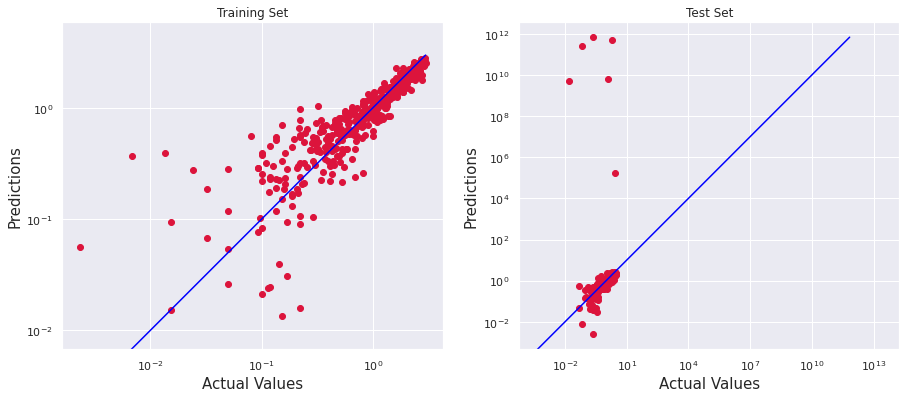

In [2985]:
#Ploting to visualize the predicted value against actual value
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train_lm, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train_lm), max(y_train))
p2 = min(min(y_pred_train_lm), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Training Set")


plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test_lm, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test_lm), max(y_test))
p2 = min(min(y_pred_test_lm), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Test Set")

plt.show()

The linear regression model is clearly a result of overfitting, the accuracy of the model on the training is nearly 1 -- which is a perfect fit. However, the model performs poorly on unseen data, explaining the negative r2 score on the test set. The different between the train set RSS and MSE values when compared to that of the test set is huge. We can conclude that using a normal linear regression model in this case is not appropriate.

## Ridge and Lasso Regression

We observe that there is a huge difference between the R-squared value of the train set and test test, this is a result of overfitting. To address this issue, we will apply regularization. Regularizartion shrinks the coefficient estimates towards zero, hence preventing multicollinearity. Regularizartion calibrates machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting

## RIDGE

Ridge regression performs L2 regularization which means that an L2 penalty is added to the loss functions to implement the reduction. A hyper parameter tuning technique known as GridSearch will be used to find the appropriate alpha (penalty term). A set of parameters will be defined and GridSearchCV will search through the best parameter values from the given set. It is basically a cross-validation method. The best alpha for ridge regression is 15.70. 

In [2903]:
#defining set of parameters to be fed to gridSearch
params = {'alpha': np.logspace(-2,4,200)}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.07189132e-02, 1.14895100e-02, 1.23155060e-02,
       1.32008840e-02, 1.41499130e-02, 1.51671689e-02, 1.62575567e-02,
       1.74263339e-02, 1.86791360e-02, 2.00220037e-02, 2.14614120e-02,
       2.30043012e-02, 2.46581108e-02, 2.64308149e-02, 2.83309610e-02,
       3.03677112e-02, 3.25508860e-02, 3.48910121e-02, 3....
       2.67384162e+03, 2.86606762e+03, 3.07211300e+03, 3.29297126e+03,
       3.52970730e+03, 3.78346262e+03, 4.05546074e+03, 4.34701316e+03,
       4.65952567e+03, 4.99450512e+03, 5.35356668e+03, 5.73844165e+03,
       6.15098579e+03, 6.59318827e+03, 7.06718127e+03, 7.57525026e+03,
       8.11984499e+03, 8.70359136e+03, 9.32930403e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2904]:
# Printing the best hyperparameter alpha
best_alpha = model_cv.best_params_
print(best_alpha['alpha'])

15.702901247293775


In [2905]:
#Building the ridge regression model
ridge_alpha = best_alpha['alpha']
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=15.702901247293775)

In [2906]:
#display the coefficient along with feature name
ridge_coef = pd.DataFrame(ridge.coef_, index = features)
ridge_coef

,0
LotFrontage,-0.020514
LotArea,0.043631
OverallQual,0.189955
OverallCond,0.076546
MasVnrArea,0.005903
ExterQual,0.058256
ExterCond,-0.024682
BsmtQual,0.076614
BsmtCond,0.022309
BsmtFinSF1,-0.014201


As expected, none of the predictor of Ridge regression is 0. Ridge took all the features into consideration while eliminating certain level of multicollinearity.

In [2907]:
# Making prediction using the ridge regression model
y_pred_train_rid = ridge.predict(X_train)
y_pred_test_rid = ridge.predict(X_test)

In [2908]:
#calculating R-Squared, RSS and MSE for ridge
metric_rid = []
r2_train_rid = r2_score(y_train, y_pred_train_rid)
print("R-squared (Train): " ,r2_train_rid)
metric_rid.append(r2_train_rid)

r2_test_rid = r2_score(y_test, y_pred_test_rid)
print("R-squared (Test): ", r2_test_rid)
metric_rid.append(r2_test_rid)

rss1_rid = np.sum(np.square(y_train - y_pred_train_rid))
print("RSS (Train): ", rss1_rid)
metric_rid.append(rss1_rid)

rss2_rid = np.sum(np.square(y_test - y_pred_test_rid))
print("RSS (Test): ",rss2_rid)
metric_rid.append(rss2_rid)

mse_train_rid = mean_squared_error(y_train, y_pred_train_rid)
print("Mean Squared Error (Train): ", mse_train_rid)
metric_rid.append(mse_train_rid**0.5)

mse_test_rid = mean_squared_error(y_test, y_pred_test_rid)
print("Mean Squared Error (Test): ",mse_test_rid)
metric_rid.append(mse_test_rid**0.5)

R-squared (Train):  0.8913036794430556
R-squared (Test):  0.815781585939048
RSS (Train):  106.41369782524862
RSS (Test):  85.63659060897965
Mean Squared Error (Train):  0.10869632055694445
Mean Squared Error (Test):  0.2038966443070944


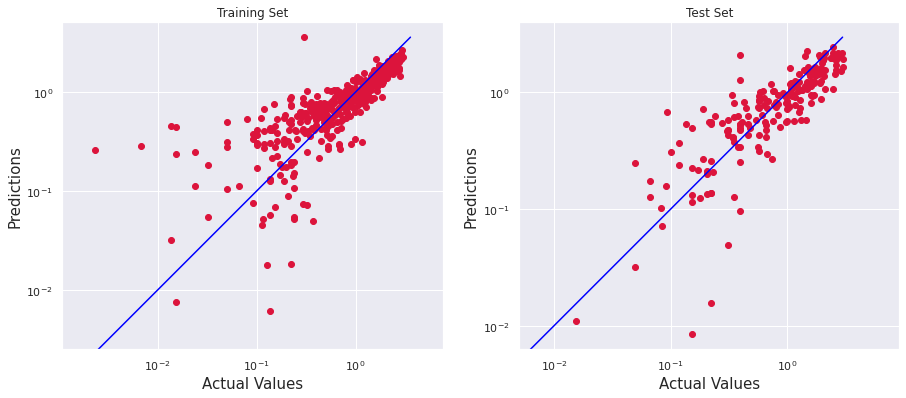

In [2986]:
#Ploting to visualize the predicted value against actual value
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train_rid, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train_rid), max(y_train))
p2 = min(min(y_pred_train_rid), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Training Set")


plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test_rid, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test_rid), max(y_test))
p2 = min(min(y_pred_test_rid), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Test Set")

plt.show()

In Ridge regression, after applying a penalty term of 15.7, we notice that the model performace has clearly improved when compared to the linear regression model. The model has been generalized and hence the model is doing a fair job in predicting values on unseen data.

## LASSO

Lasso regression performs L1 regularization which adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in some coefficients becoming 0 and it is sort of feature selection. We will use the same hyper tuning parameter technique, GridSearch to find the optimal alpha for Lasso regression. In this case, the alpha selected is 0.01.


In [2990]:
lasso = Lasso()

# Grid search cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.07189132e-02, 1.14895100e-02, 1.23155060e-02,
       1.32008840e-02, 1.41499130e-02, 1.51671689e-02, 1.62575567e-02,
       1.74263339e-02, 1.86791360e-02, 2.00220037e-02, 2.14614120e-02,
       2.30043012e-02, 2.46581108e-02, 2.64308149e-02, 2.83309610e-02,
       3.03677112e-02, 3.25508860e-02, 3.48910121e-02, 3....
       2.67384162e+03, 2.86606762e+03, 3.07211300e+03, 3.29297126e+03,
       3.52970730e+03, 3.78346262e+03, 4.05546074e+03, 4.34701316e+03,
       4.65952567e+03, 4.99450512e+03, 5.35356668e+03, 5.73844165e+03,
       6.15098579e+03, 6.59318827e+03, 7.06718127e+03, 7.57525026e+03,
       8.11984499e+03, 8.70359136e+03, 9.32930403e+03, 1.00000000e+04])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2991]:
lasso_alpha = model_cv.best_params_
print(lasso_alpha['alpha'])

0.01


In [2992]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients which have been penalised
lasso = Lasso(alpha=lasso_alpha['alpha'])
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [2993]:
#display the coefficient along with feature name
lasso_coef = pd.DataFrame(lasso.coef_, index = features)
lasso_coef

,0
LotFrontage,0.000000
LotArea,0.057462
OverallQual,0.240670
OverallCond,0.069388
MasVnrArea,0.006309
ExterQual,0.079850
ExterCond,-0.000000
BsmtQual,0.063696
BsmtCond,-0.000000
BsmtFinSF1,0.000000


In [2994]:
#count how many features were eliminated
total_f = 0
for i in lasso.coef_:
    if i == 0: 
        total_f += 1

print('Number of features eliminated is:', total_f )
print('Number of features taken into account is: ', (241 - total_f) )


Number of features eliminated is: 198
Number of features taken into account is:  43


In [2995]:
# Making prediction using lasso model
y_pred_train_ls = lasso.predict(X_train)
y_pred_test_ls = lasso.predict(X_test)

In [2996]:
#calculating R-Squared, RSS and MSE for ridge
metric_ls = []
r2_train_ls = r2_score(y_train, y_pred_train_ls)
print("R-squared (Train): " ,r2_train_ls)
metric_ls.append(r2_train_ls)

r2_test_ls = r2_score(y_test, y_pred_test_ls)
print("R-squared (Test): ", r2_test_ls)
metric_ls.append(r2_test_ls)

rss1_ls = np.sum(np.square(y_train - y_pred_train_ls))
print("RSS (Train): ", rss1_ls)
metric_ls.append(rss1_ls)

rss2_ls = np.sum(np.square(y_test - y_pred_test_ls))
print("RSS (Test): ",rss2_ls)
metric_ls.append(rss2_ls)

mse_train_ls = mean_squared_error(y_train, y_pred_train_ls)
print("Mean Squared Error (Train): ", mse_train_ls)
metric_ls.append(mse_train_ls**0.5)

mse_test_ls = mean_squared_error(y_test, y_pred_test_ls)
print("Mean Squared Error (Test): ",mse_test_ls)
metric_ls.append(mse_test_ls**0.5)

R-squared (Train):  0.8444589639413397
R-squared (Test):  0.8165281211432289
RSS (Train):  152.27467430142846
RSS (Test):  85.28955293643476
Mean Squared Error (Train):  0.15554103605866032
Mean Squared Error (Test):  0.20307036413436846


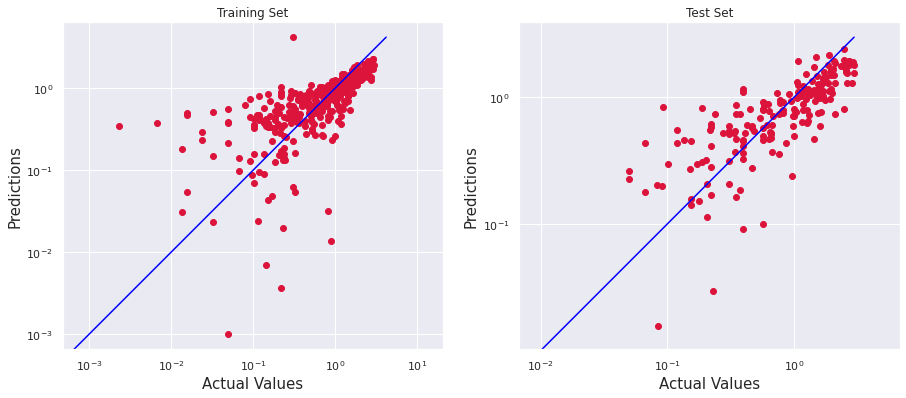

In [2997]:
#Ploting to visualize the predicted value against actual value
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train_ls, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_train_ls), max(y_train))
p2 = min(min(y_pred_train_ls), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Training Set")


plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test_ls, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_test_ls), max(y_test))
p2 = min(min(y_pred_test_ls), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Test Set")

plt.show()

In Lasso regression, after applying a penalty term of 0.01, we notice that the model performace has clearly improved when compared to the linear regression model. The algorithm also performed feature elimination by shrinking some features' coefficient to 0. The accuracy of the model is good and the predicted values on the test set was more or less the same with ridge regression

## 5. Data Evaluation

In [2917]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_rid, name = 'Ridge Regression')
ls_metric = pd.Series(metric_ls, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.430428e-01,0.891304,0.844459
1,R2 Score (Test),-1.860349e+21,0.815782,0.816528
2,RSS (Train),5.576113e+01,106.413698,152.274674
3,RSS (Test),8.648102e+23,85.636591,85.289553
4,MSE (Train),2.386571e-01,0.329691,0.394387
5,MSE (Test),4.537700e+10,0.451549,0.450633


In [2918]:
betas = pd.DataFrame(index=features)
betas.rows = features
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [2919]:
pd.set_option('display.max_rows', None)
betas.head(15)

,Linear,Ridge,Lasso
LotFrontage,2.419688e-02,-0.020514,0.000000
LotArea,9.373582e-02,0.043631,0.057462
OverallQual,1.361543e-01,0.189955,0.240670
OverallCond,9.453097e-02,0.076546,0.069388
MasVnrArea,2.728074e-02,0.005903,0.006309
ExterQual,2.357966e-02,0.058256,0.079850
ExterCond,-4.515428e-02,-0.024682,-0.000000
BsmtQual,5.540406e-02,0.076614,0.063696
BsmtCond,6.027882e-03,0.022309,-0.000000
BsmtFinSF1,3.369131e+11,-0.014201,0.000000


In [2920]:
#plot the top 10 and bottom 10 feature based on coefficient
def plot_featImp(model, title):
    coef = model.coef_
    zipped = list(zip(features, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(10)
    bottom_10 = pd.DataFrame(zipped).tail(10)
    pf = pd.concat([top_10, bottom_10], axis=0)
    ax = sns.barplot(y=0, x=1 , data=pf, orient = "h").set_title(title)

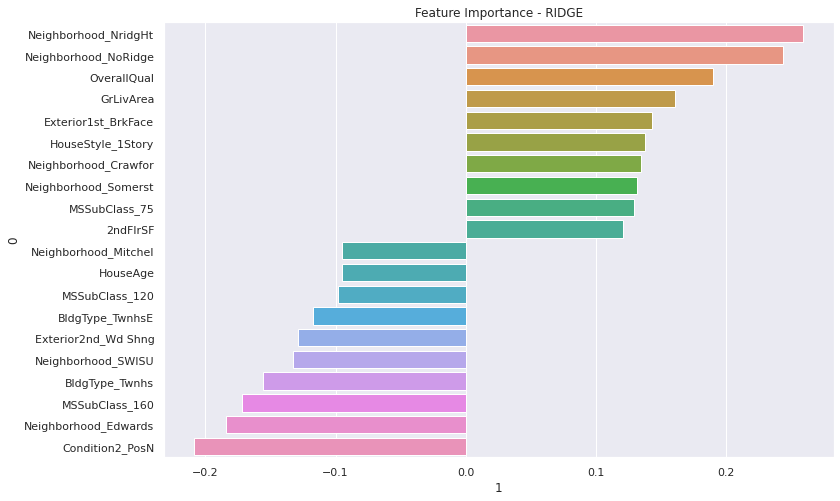

In [2921]:
plt.figure(figsize=(12, 8))
plot_featImp(ridge, 'Feature Importance - RIDGE')

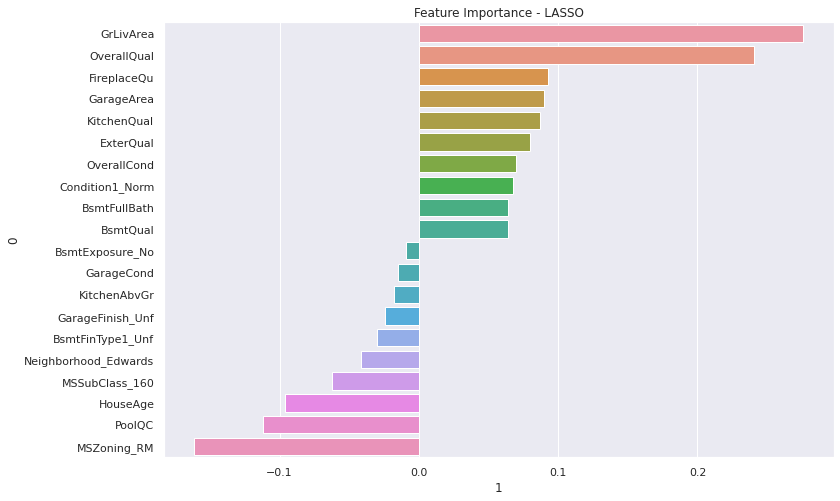

In [2922]:
plt.figure(figsize=(12, 8))
plot_featImp(lasso, 'Feature Importance - LASSO')

# Conclusion

- After evaluating the three different models on metrics like accuracy, RSS and MSE, I have concluded that the best model to use is Lasso because it is more robust and peformed feature elimination. 
- The R-squared difference between train and test set for lasso is minimal when compared to ridge model. 
- The lasso optimal model that has accounted for 84% of the variance in the training set and it did a good job in predicting the house prices on the test set.
- After analysing the top features from both ridge and lasso, it is more evident that lasso model is more suitable in respect to the business aspect. 
- Ridge ranked the types of neighbourhood first while lasso ranked the living area square feet first followed by the house quality.
- In terms of business aspect, it makes more sense that a house bigger in terms of square feet and coupled with better quality will cost more. 

#### The five most significant variables that affect the sale price are: 

1. GrLivArea : Above ground living area square feet
2. OverallQual : Overall material and finish of the house
3. FireplaceQu : Fireplace quality
4. GarageArea : Size of garage in square feet
5. KitchenQual : Kitchen Quality

#### The extent to which those variable describe the sale price is given by their coffiecient as listed below:
1. GrLivArea	: 0.275807
2. OverallQual	: 0.240670
3. FireplaceQu	: 0.092401
4. GarageArea	: 0.089977
5. KitchenQual	: 0.087176

To conclude, the lasso model does introduce some level of bias in the data but in turns it becomes more statistically stable. Regularized models do perform better on this dataset.

# Assignment Questions

Question 1 : Double the value of alpha and observe the changes in the model.

In [2943]:
#Building the ridge regression model
ridge_alpha_double = ridge_alpha * ridge_alpha
ridge_double = Ridge(alpha=ridge_alpha_double)

ridge_double.fit(X_train, y_train)

Ridge(alpha=246.58110758226042)

In [2944]:
# Making prediction using the ridge regression model
y_pred_train_r2 = ridge_double.predict(X_train)
y_pred_test_r2 = ridge_double.predict(X_test)

In [2945]:
#calculating R-Squared, RSS and MSE for ridge
metric1 = []

metric1.append(r2_score(y_train, y_pred_train_r2))
metric1.append (r2_score(y_test, y_pred_test_r2))
metric1.append(np.sum(np.square(y_train - y_pred_train_r2)))
metric1.append(np.sum(np.square(y_test - y_pred_test_r2)))
metric1.append (mean_squared_error(y_train, y_pred_train_r2))
metric1.append(mean_squared_error(y_test, y_pred_test_r2))

In [2946]:
#Fitting Lasso model for double alpha value
double_alpha = lasso_alpha['alpha'] * lasso_alpha['alpha']
lasso_db = Lasso(alpha=double_alpha)
        
lasso_db.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [2947]:
# Making prediction using lasso model
y_pred_train_l2 = lasso_db.predict(X_train)
y_pred_test_l2 = lasso_db.predict(X_test)

In [2948]:
#calculating R-Squared, RSS and MSE for Lasso
metric2 = []

metric2.append(r2_score(y_train, y_pred_train_l2))
metric2.append (r2_score(y_test, y_pred_test_l2))
metric2.append(np.sum(np.square(y_train - y_pred_train_l2)))
metric2.append(np.sum(np.square(y_test - y_pred_test_l2)))
metric2.append (mean_squared_error(y_train, y_pred_train_l2))
metric2.append(mean_squared_error(y_test, y_pred_test_l2))

In [2949]:
# Creating a table which contain all the metrics
lr2_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

lr2_metric = pd.DataFrame(lr2_table ,columns = ['Metric'] )

rg2_metric = pd.Series(metric1, name = 'Ridge Regression')
ls2_metric = pd.Series(metric2, name = 'Lasso Regression')

final_db_metric = pd.concat([lr2_metric, rg2_metric, ls2_metric], axis = 1)

final_db_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.849508,0.940894
1,R2 Score (Test),0.811331,0.542816
2,RSS (Train),147.331967,57.864646
3,RSS (Test),87.705431,212.528450
4,MSE (Train),0.150492,0.059106
5,MSE (Test),0.208822,0.506020


In [2964]:
#extract the top predictor in the model
def top_feat(model):
    coef = model.coef_
    zipped = list(zip(features, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_1 = pd.DataFrame(zipped).head(5)
    return top_1

In [2965]:
#view the top predictor for ridge regression with double value of alpha
top_feat(ridge_double)

,0,1
0,OverallQual,0.161681
1,GrLivArea,0.101319
2,KitchenQual,0.088121
3,ExterQual,0.083546
4,GarageArea,0.077637


In [2966]:
#view the top predictor for lasso regression with double value of alpha
top_feat(lasso_db)

,0,1
0,RoofMatl_CompShg,5.743132
1,RoofMatl_Tar&Grv,5.741194
2,RoofMatl_WdShake,5.569610
3,RoofMatl_WdShngl,5.553336
4,RoofMatl_Roll,5.458338


Question 3 : Create another Lasso model excluding the five most important predictor variables.

In [2967]:
X_train_lasso = X_train.drop(['GrLivArea','OverallQual','FireplaceQu','GarageArea','KitchenQual'],axis=1)

In [2969]:
X_test_lasso = X_test.drop(['GrLivArea','OverallQual','FireplaceQu','GarageArea','KitchenQual'],axis=1)

In [2974]:
X_train_lasso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 162 to 836
Columns: 236 entries, LotFrontage to Remodel_Yes
dtypes: float64(37), uint8(199)
memory usage: 480.9 KB


In [2970]:
#Fitting Lasso model for double alpha value
lasso_m3 = Lasso(alpha=lasso_alpha['alpha'] )
lasso_m3.fit(X_train_lasso, y_train) 

Lasso(alpha=0.01)

In [2971]:
# Making prediction using lasso model
y_pred_train_m3 = lasso_m3.predict(X_train_lasso)
y_pred_test_m3 = lasso_m3.predict(X_test_lasso)

In [2972]:
#view the top predictor for new lasso regression 
top_feat(lasso_m3)

,0,1
0,HeatingQC,0.259237
1,1stFlrSF,0.251741
2,MasVnrArea,0.180830
3,KitchenQual,0.151136
4,Neighborhood_Mitchel,0.131792


In [2998]:
#view the top predictor for new lasso regression 
top_feat(lasso)

,0,1
0,GrLivArea,0.275807
1,OverallQual,0.240670
2,FireplaceQu,0.092401
3,GarageArea,0.089977
4,KitchenQual,0.087176
